# Pre-trained Model

#### 1. Introduction to Pre-trained Model and Transfer Learning
#### 2. Classification using Pretrained model
#### 3. Interpreting Features from an arbitrary layer
#### 4. Fine Tuning the Pretrained model 

The pretrained models can either be used directly or we can make some changes in it. If we make changes then it called as fine-tuning of Pretrained model. By fine tuning can be used for developing a new model by using some parts of old model as it is.

# CNN - specifically developed for dealing with images

We know that CNN is made up of 2 parts - Feature Extraction and Classification.

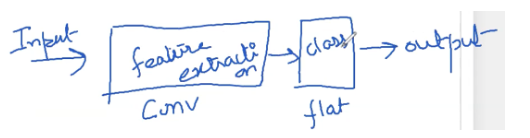

- The idea of pre-trained models or called as concept of transfer learning in which we can transfer the information that we have extracted from one of the n/w & use it for traning of another type of dataset.
- U r transferring the learning that u have done for 1 particular type of dataset for another type of dataset & these r known as pre-trained models.
- By Pre-trained models we r referring to some neural n/w models that r standard.
- Most of time we develop our own models but we can also make use of models that r already available i.e. pre-trained models.

### This concept of transfer learning is more applicable to computer vision problems or particularly to the image problems.
In transfer learning instead of learning from scratch we try to learn from patters that have already been obtained. This pre-trined model will help u in getting some of the initial features. 

## Introduction: Transfer Learning using Pre-trained models
Transfer learning is a popular method in computer vision that allows us to build accurate models in a timesaving way. 
With transfer learning, instead of starting the learning process from scratch, we start from patterns that have been learned when solving a different problem. This way we can leverage previous learnings and avoid starting from scratch.
In computer vision, transfer learning is usually expressed through the use of pre-trained models. 
**A pre-trained model is a model that was trained on a large benchmark dataset to solve a problem similar to the one that we want to solve.**

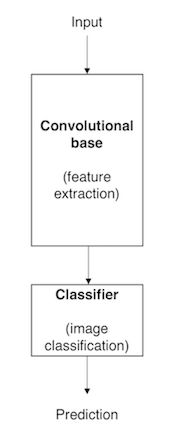

#### Transfer learning using Pre-trained models can be used as -
- Classifier: 
    The pre-trained model is used directly to classify new images.
    
    
- Standalone Feature Extractor:
    The pre-trained model, or some portion of the model, is used to pre-process images to extract relevant features. Extracting features is a useful thing cz we can use it on a fresh dataset.
    
    
- Integrated Feature Extractor: 
    The pre-trained model, or some portion of the model, is integrated into a new model, but layers of the pre-trained model are frozen during training.
    
    
- Weight Initialization:
    The pre-trained model, or some portion of the model, is integrated into a new model, and the layers of the pre-trained model are trained in concert with the new model

The last three categories come under fine tuning the pre-rained models. 

#### There are three strategies to fine tune a model-
    
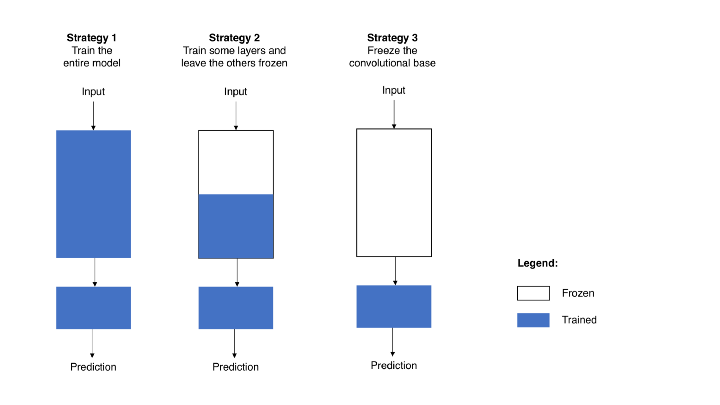

#### Common used Transfer Learning Models
    Inception
    Xception
    VGG Family
    ResNet
    DenseNet
    
image source: https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751

*<font color=blue>Whatever we are freezing we want to use that part as it without doing any changes.*

**Strategy1** - We will be training the weights again, train all weights again.

**Strategy2** - We are going to train some of the weights i.e. we r going to train some of the layers only. As seen in above diagram initial layers are frozen which detect edges, corners etc while the deeper layers can be changed which are responsible for complex features more specific to the given problem.

**Strategy3** - We will use the weights as it is for convolution or feature extraction part but we can make changes in the classification part. 

Below are neural networks which are already available for use. They r available in Keras and in tensorflow.

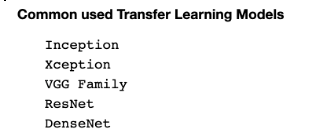

### <font color=blue>When u pass the images of your dataset through this pre-trained model although it has been trained on ImageNet dataset still it will extract the features from your dataset that is given. These are generalized models but will extract features as per our data which is passed through them.

## <font color=blue>Classification
## <font color=blue>Pre-trained model VGG19

We call these models like vgg19,ResNet as standard models because they have been trained on very large datasets like ImageNet which consists of pictures of different objects.

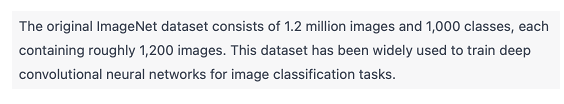

For your problem if dataset is v.big or dataset is domain specific maybe you would like go for building neural n/w from scratch or use some part from pretrained model as shown above from Strategy1, 2 or 3.

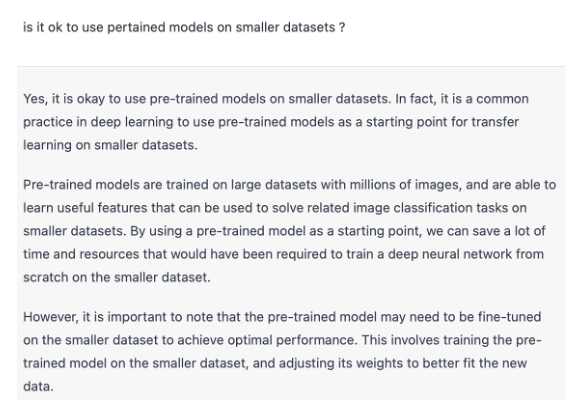

For Fine tuning pre-trained model to suit or adapt to our problem, we have above strategies -1,2 and 3 as shown in figure abive.

In [1]:
from tensorflow.keras.applications.vgg19 import VGG19  # directly importing VGG19

from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from keras.applications.vgg19 import decode_predictions
from keras.models import Model
from matplotlib import pyplot as plt
import numpy as np
from numpy import expand_dims

Most of models written here have won some award that are particularly for neural n/w's.

### Model architecture of VGG19

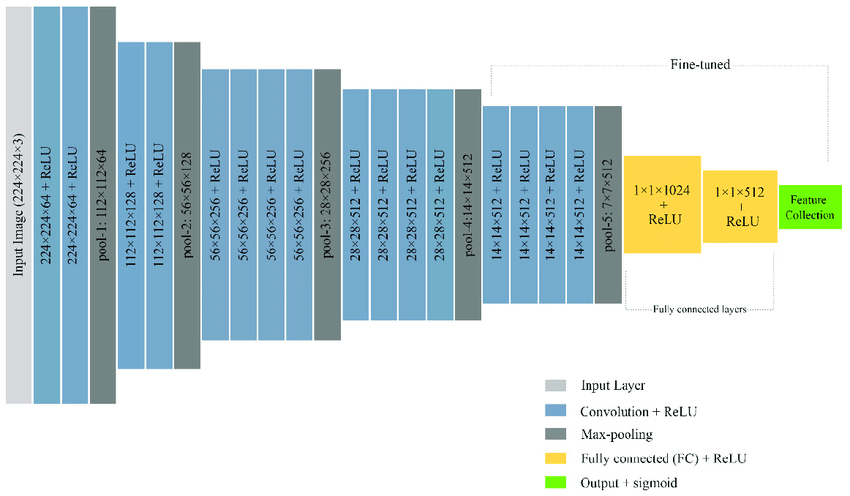


image source- https://www.researchgate.net/publication/342815128_machine_learning_knowledge_extraction_Focal_Liver_Lesion_Detection_in_Ultrasound_Image_Using_Deep_Feature_Fusions_and_Super_Resolution

### Load the model


While loading the model parameter "Include_top"  lets you select if you want the final dense layers or not.

<font color=blue>the convolutional layers work as feature extractors. They identify a series of patterns in the image, and each layer can identify more elaborate patterns by seeing patterns of patterns.

<font color=blue>The dense layers are capable of interpreting the found patterns in order to classify: this image contains cats, dogs, cars, etc.

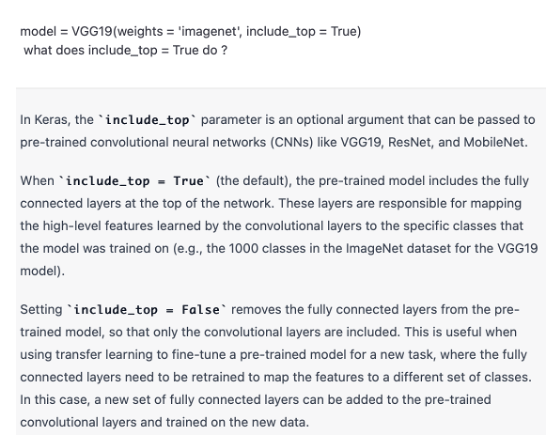

*Sometimes tfds (tensorflow datasets) does not work well, so you can download through url or if you have a dataset of ur own u can pass it & see which model is best for it.*

In [2]:
model = VGG19(weights = 'imagenet', include_top = True)
model.summary()

# Weights we r taking of imagenet over which it has been trained.

2023-04-02 11:51:07.355158: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

`predictions (Dense)  (None, 1000)` as seen above because we used `include_top = True` which lets fully connected layers of VGG19 to be as it is & VGG19 has 1000 classes as output.

### Load an image and make the prediction with the model (VGG19)

1/1 [==============================] - 0s 455ms/step


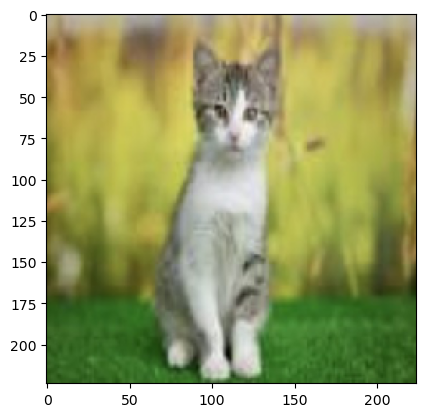

In [3]:
#Load the image
img = image.load_img("datasets/cat.jpg",target_size = (224,224))
plt.imshow(img)
img = image.img_to_array(img)
img = expand_dims(img,axis=0)
img = preprocess_input(img)

#Predict the image with the VGG19
features = model.predict(img)


### Decode the prediction

In [4]:
# Decode the prediction to know the class label and the probability of that class
label = decode_predictions(features)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

Egyptian_cat (50.05%)



## Interprating the Feature maps and filters of an arbitrary layer of VGG19

### Load the model

In [5]:
# Load the model 
model = VGG19()

### Extract the feature maps of a given layer 

Now, input of the model will be same, however, the output will be the resultant feature maps of any given layer.

In [6]:
#Extract the feature maps of layer index 1.
model = Model(inputs = model.inputs, outputs = model.layers[1].output)

### Visualize the Feature maps

1/1 [==============================] - 0s 29ms/step


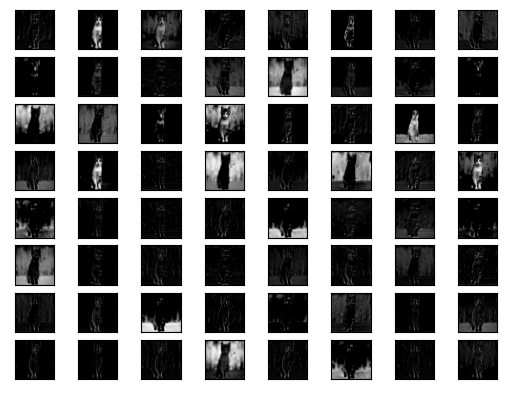

In [7]:
#Load the image
img = image.load_img("datasets/cat.jpg",target_size = (224,224))
img = image.img_to_array(img)
img = expand_dims(img,axis=0)
img = preprocess_input(img)

#Make prediction 
feature_maps = model.predict(img)

#Visualize the feature maps
square = 8
ix = 1
for i in range(square):
    for j in range(square):
        ax = plt.subplot(square,square,ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0,:,:,ix-1],cmap = 'gray')
        ix += 1
plt.show()

### Interprate and Visualize the Feature maps throughout the model

1/1 [==============================] - 0s 375ms/step


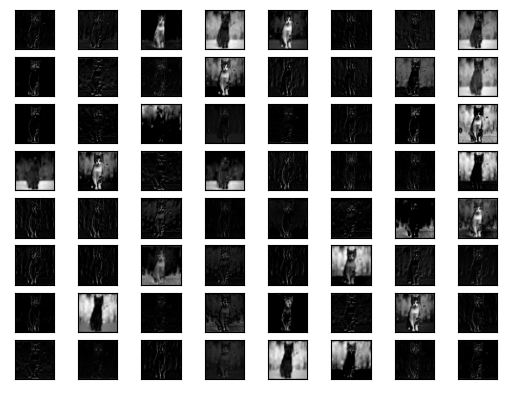

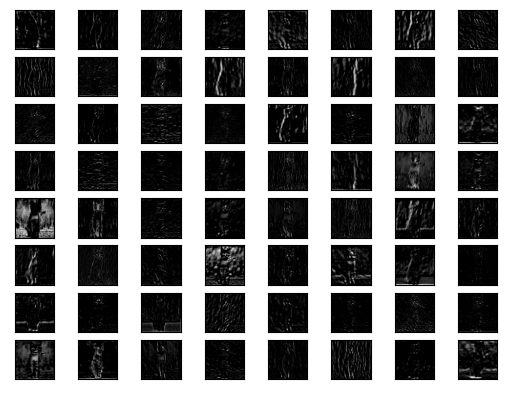

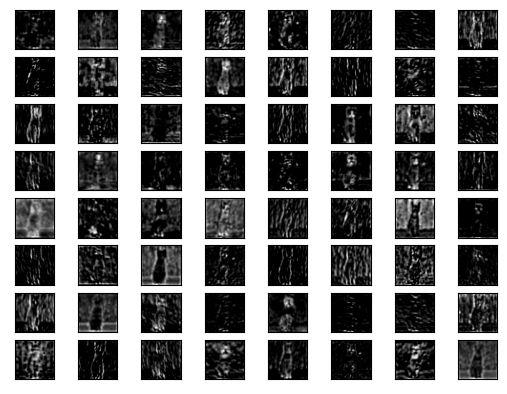

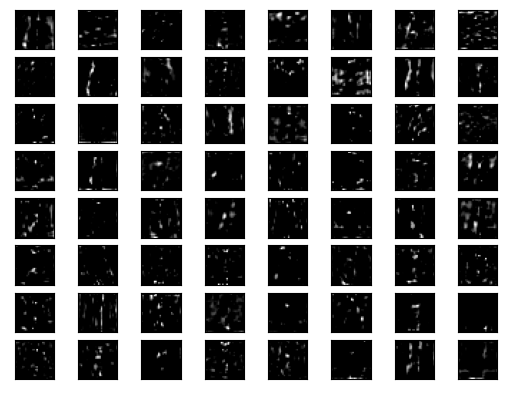

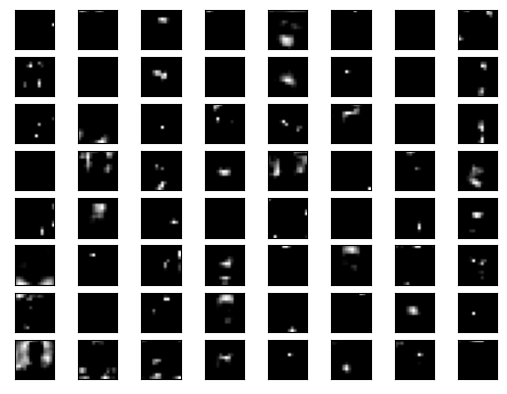

In [8]:
model = VGG19() 

#Take the essential layers index of VGG19
ixs = [2,5,10,15,20]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs = model.inputs, outputs = outputs)

img = image.load_img("datasets/cat.jpg",target_size = (224,224))
img = image.img_to_array(img)
img = expand_dims(img,axis=0)
img = preprocess_input(img)
feature_maps = model.predict(img)
square = 8
for fmaps in feature_maps:
    ix = 1
    for i in range(square):
        for j in range(square):
            ax = plt.subplot(square,square,ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(fmaps[0,:,:,ix-1],cmap = 'gray')
            ix += 1
    plt.show()

## Fine tuning the Pre-trained model Xception

Xception and Inception models are more complex than VGG Family whose architecture is comparatively easier to understand.


In these pre-trained models many experiments on stride and pooling as well are done.

The 1st pre-trained model was on filter size 1 i.e. 1 row and 1 column matrix but now generally we take atleast size 2x2 for filter.

### Xception Model architecture

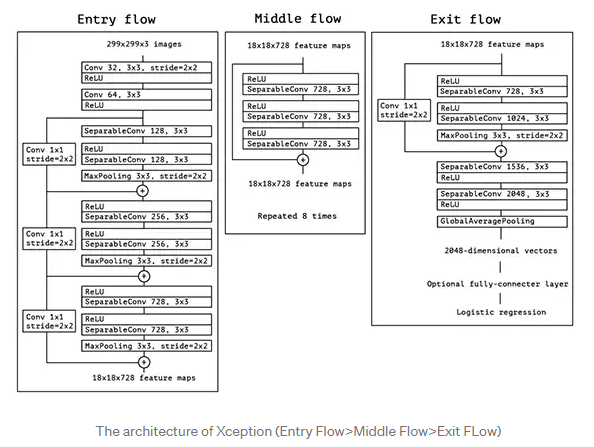


Image Source: https://medium.com/analytics-vidhya/image-recognition-using-pre-trained-xception-model-in-5-steps-96ac858f4206

In [9]:
#!pip install tensorflow
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL    # Python imaging library for images
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

### Load the data

The dataset used here is the Flower dataset from tensorflow.The dataset contains several thousand photos of flowers and there are Five classes in the dataset-

- daisies
- dandelion
- roses
- sunflowers
- tulips

In [10]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)


### Split the data into train and validation set

In [11]:
img_height,img_width=150,150
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [12]:
#Print the classes of the dataset
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


### Visualize the data 

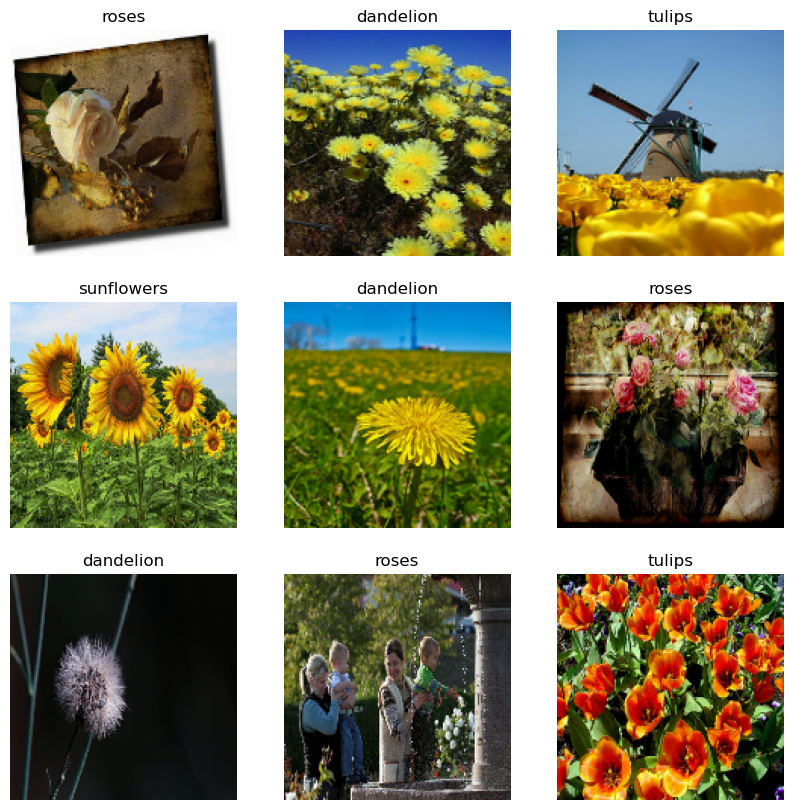

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Fine tuning: Freeze the Convolutional base (Strategy-3)


*Some situations in which we need to freeze convolution and just use classification part will be when u can relate that ur dataset is similar to Imagenet dataset so feature extraction/cnn can be directly used from pre-trained and then classify based on your class names given in your dataset.*

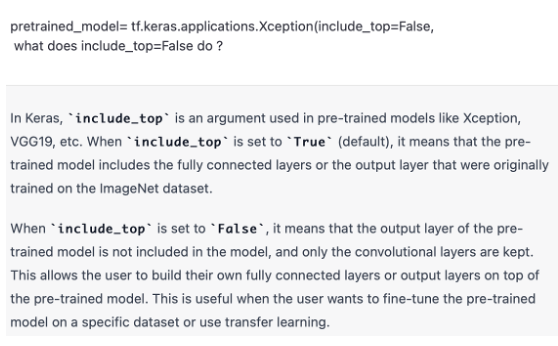

In [14]:
#Initialize a custom Sequentiol model
xception_model = Sequential()

#Load the pre-trained model Xception
#Set include_top as False
#Freeze the lower layers of the pretrained model by setting the layer.trainable as False


pretrained_model= tf.keras.applications.Xception(include_top=False, # means dense layers
                   input_shape=(150,150,3),                         # can be trained/customised
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False    # Freezing means layers r frozen weights r kept as it is
                                 # Convolution non-trainable
xception_model.add(pretrained_model)
xception_model.add(Flatten())

#Add the customized layers for classification
xception_model.add(Dense(512, activation='relu'))
xception_model.add(Dense(256, activation='relu'))
xception_model.add(Dense(5, activation='softmax'))


In [15]:
#Print the model structure and see the trainable parameters
xception_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 256)              131328    
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 5)                1285      
 pper)                                                  

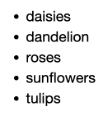

The last layer shows 5 neurons cz the dataset which we are using has 5 classes which we want to classify using xception_model.

- We have frozen comvolution part and only customized fully connected dense part.
- <font color=blue>Trainable params: 1,181,701 for the fully connected part which needs to be learnt
- <font color=blue>Non-trainable params: 20,861,480 for Convolution part that is freezed (just use weights as it is, no need to re-train).

### Compile the model

In [16]:
xception_model.compile(optimizer='adam',
                       loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                       metrics=['accuracy'])


### Train the model

In [17]:
epochs=5
history = xception_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5


/Users/sylvia/opt/anaconda3/envs/tf_dl/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 105s 1s/step - loss: 3.7622 - accuracy: 0.3512 - val_loss: 1.5563 - val_accuracy: 0.4210
Epoch 2/5
92/92 [==============================] - 103s 1s/step - loss: 1.3859 - accuracy: 0.4707 - val_loss: 1.5156 - val_accuracy: 0.3910
Epoch 3/5
92/92 [==============================] - 102s 1s/step - loss: 1.1860 - accuracy: 0.5463 - val_loss: 1.3501 - val_accuracy: 0.4918
Epoch 4/5
92/92 [==============================] - 103s 1s/step - loss: 1.1136 - accuracy: 0.5811 - val_loss: 1.3061 - val_accuracy: 0.5014
Epoch 5/5
92/92 [==============================] - 103s 1s/step - loss: 1.0353 - accuracy: 0.6080 - val_loss: 1.2841 - val_accuracy: 0.5068


### Plot Training and Validation Accuracy and Loss curve

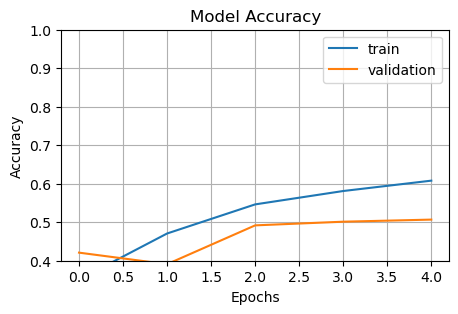

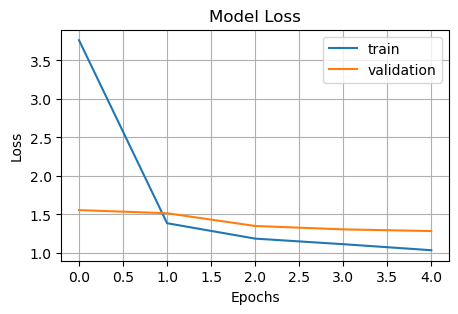

In [18]:
# Accuracy Curve
plt.figure(figsize=(5,3))
ig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Loss Curve
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

### Predict with the model

(378, 306, 3)
(1, 150, 150, 3)


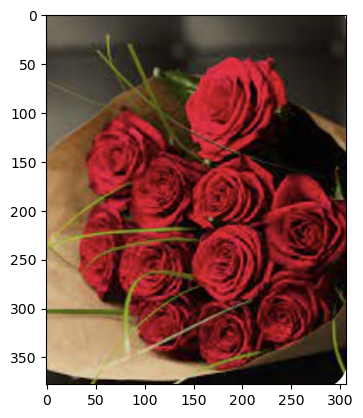

In [19]:
#!pip install opencv-python
#Load and Preprocess the image
import os
os.sys.path
import cv2
image=cv2.imread('datasets/roses.jpg')
print (image.shape)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
image_resized= cv2.resize(image_rgb, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

In [20]:
pred=xception_model.predict(image)
print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

1/1 [==============================] - 0s 473ms/step
[[0.02870602 0.07407374 0.637271   0.16622598 0.09372324]]
The predicted class is roses


### Train the entire model (Strategy-1) - Convolution as well as Dense part will be used of xception (no customization)

In [21]:
#Initialize a custom Sequentiol model
xception_model = Sequential()

#Load the pre-trained model Xception
#Set include_top as False
#Freeze the lower layers of the pretrained model by setting the layer.trainable as False

pretrained_model= tf.keras.applications.Xception(include_top=False,  # Dense trainable
                   input_shape=(150,150,3),
                   pooling='avg',classes=5,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=True              # Convolution trainable
# Here it means that initially the weight values were of imagenet dataset but now since 
# we have mentioned layer.trainable=True so even though we do not explicitly define
# custom conv layers like we did for dense but still these will be re-trained based 
# on our supplied dataset at the backend & weights will be different.
        
        
xception_model.add(pretrained_model)
xception_model.add(Flatten())

#Add the customized layers for classification
xception_model.add(Dense(512, activation='relu'))
xception_model.add(Dense(256, activation='relu'))
xception_model.add(Dense(5, activation='softmax'))

In [22]:
#Print the model structure and see the trainable parameters

xception_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 module_wrapper_4 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_5 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_6 (ModuleWra  (None, 256)              131328    
 pper)                                                           
                                                                 
 module_wrapper_7 (ModuleWra  (None, 5)                1285      
 pper)                                                

### Compile the model

In [23]:
xception_model.compile(optimizer='adam',
                       loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                       metrics=['accuracy'])


### Train the model

In [24]:
epochs=5 #Increase the number of epochs
history = xception_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
92/92 [==============================] - 390s 4s/step - loss: 0.7437 - accuracy: 0.7599 - val_loss: 24.6669 - val_accuracy: 0.4741
Epoch 2/5
92/92 [==============================] - 386s 4s/step - loss: 0.4633 - accuracy: 0.8467 - val_loss: 1.0398 - val_accuracy: 0.7861
Epoch 3/5
92/92 [==============================] - 385s 4s/step - loss: 0.3398 - accuracy: 0.9070 - val_loss: 2.8253 - val_accuracy: 0.7916
Epoch 4/5
92/92 [==============================] - 380s 4s/step - loss: 0.3127 - accuracy: 0.9040 - val_loss: 0.5619 - val_accuracy: 0.8529
Epoch 5/5
92/92 [==============================] - 381s 4s/step - loss: 0.1935 - accuracy: 0.9377 - val_loss: 0.8385 - val_accuracy: 0.8447


### Plot Training and Validation Accuracy and Loss curve

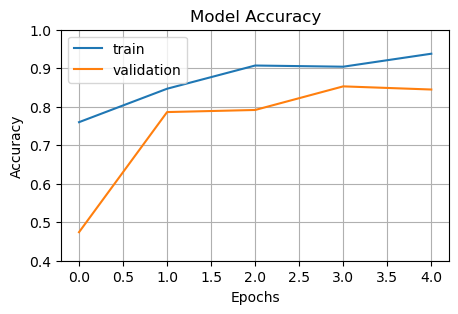

In [28]:
# Accuracy Curve

plt.figure(figsize=(5,3))
ig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()



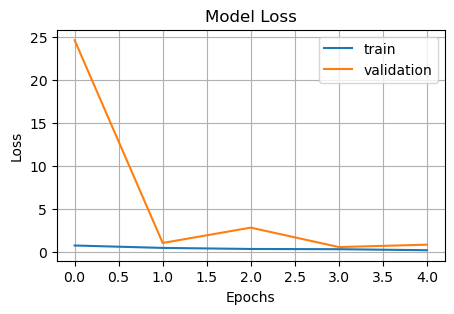

In [29]:
# Loss Curve

plt.figure(figsize=(5,3))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Reference

1. Pre-trained models - https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751


2. Visualizing features in CNN layers - https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c